In [1]:
import tensorflow as tf

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

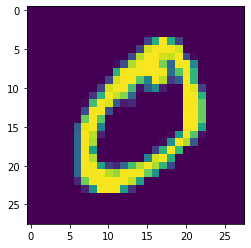

In [7]:
plt.imshow(X_train[1])

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train=X_train/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#create CNN from here
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [14]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1))) #1 for the gray scale img,64 = no. of filters
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu')) 
model.add(MaxPooling2D((2,2)))

model.add(Flatten()) #To get in 1dimentional

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

conv2d_1:
Initial Image Size (28,28,1)
we used 32 filters of (3,3)
(28,28,1)---->(32,3,3)----->(26,26,64)[Output shape]  
reason:{1 filter is convolving over (28,28,1)img and thus we get (26,26,64)}
    CALCULATION: 
    i)Output Shape: (28-3)+1=26
    ii)Trainable Parameter: 64*3*3+64(this 64 is the Bias)=640
max_pooling2d_1:    
  When we will go to maxpooling then it will make the half of conv2d as we use(2,2) so the output shape-->(13,13,64) 
  Maxpooling will not generate any trainable parameters as it does not learn anything
conv2d_2:  
  (13,13,64)---->(3,3,64)---->(11,11,64)
  CALCULATION:
      Trainable Parameter: 64*3*3*64+64=36928
max_pooling2d_2:      
  next again maxpooling
  so it will again make half(5,5,64)
flatten_1:  
  Next flatten means this layer make the one dimentional--->(5*5*64)=1600
dense_1:
    trainable parameters: flatten-1 * dense_1 + dense_1------>(1600*128)+128=204928
dense_2:
    trainable parameters: dense_1* dense_2 +dense_2------>(128*10)+10=1290

In [16]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [18]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 66s 1ms/step - loss: 0.1361 - accuracy: 0.9582 - val_loss: 0.0492 - val_accuracy: 0.9855
Epoch 2/10
54000/54000 [==============================] - 67s 1ms/step - loss: 0.0430 - accuracy: 0.9870 - val_loss: 0.0503 - val_accuracy: 0.9873
Epoch 3/10
54000/54000 [==============================] - 69s 1ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0388 - val_accuracy: 0.9898
Epoch 4/10
54000/54000 [==============================] - 69s 1ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0305 - val_accuracy: 0.9920
Epoch 5/10
54000/54000 [==============================] - 69s 1ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0322 - val_accuracy: 0.9917
Epoch 6/10
54000/54000 [==============================] - 68s 1ms/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.0377 - val_accuracy: 0.9915
Epoch 7/10
54000/54000 [==============================] - 69s 1ms/ste